<a href="https://colab.research.google.com/github/stephendambo/Dambolin9/blob/Master/Final_Project_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

#Loading Dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"stephendambo","key":"10d74781362db51b4bdba72fe5914678"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          20325        432  1.0              
samyakb/student-stress-factors                              Student stress factors                              887B  2023-11-02 12:42:11           1728         44  0.9411765        
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28          11111        270  1.0              
joebeachcapital/30000-spotify-songs                         30000 Spotify Songs      

In [7]:
! kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 65.3MB/s]


In [8]:
! unzip mobile-price-classification

Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

#Dataset Top 5 Rows & Colunms

In [10]:
df = pd.read_csv('/content/train.csv', header = 0)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#Dataset Bottom 5 Rows & Colunms

In [11]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


#Exploratory Analysis

#Dataset Rows And Columns Count

In [12]:
df.shape

(2000, 21)

#Dataset Informations

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#Duplicate Count

In [14]:
duplicate_value = len(df[df.duplicated()])
print('Number of duplicated value:', duplicate_value)

Number of duplicated value: 0


#Missing Values/Null Count

In [15]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#Statistical Information of Dataset

In [16]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#Dataset Visualization

#Price Range

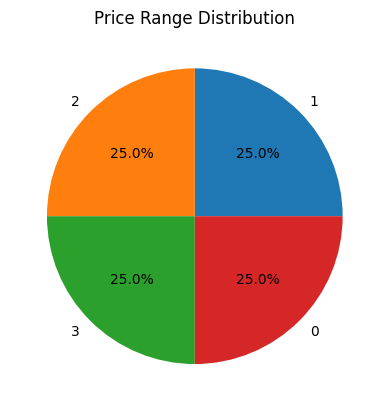

In [17]:
price_counts = df['price_range'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%')
plt.title('Price Range Distribution')
plt.show()

#Relationship Between Battery Power And Price Range

<Axes: xlabel='price_range', ylabel='battery_power'>

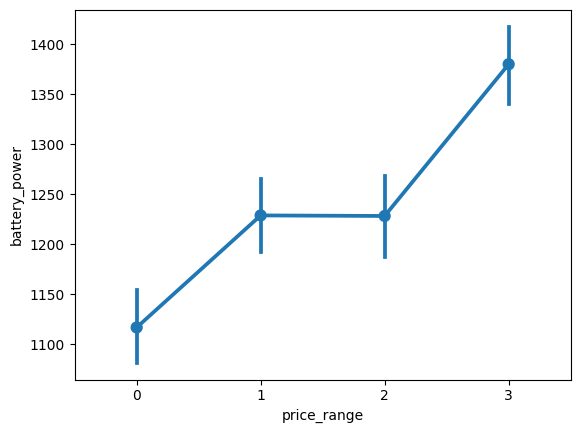

In [18]:
sns.pointplot(y = 'battery_power', x = 'price_range', data=df)

#Relationship Between Internal Memory And Price Range

<Axes: xlabel='price_range', ylabel='int_memory'>

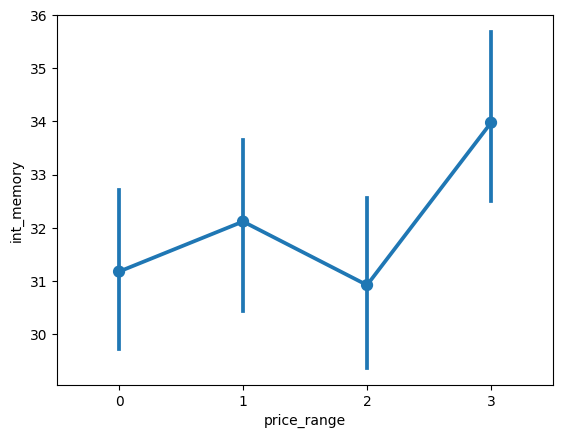

In [19]:
sns.pointplot(y = 'int_memory', x = 'price_range', data=df)

#Plotting Relationship Between Price Range And Ram

<Axes: xlabel='price_range', ylabel='ram'>

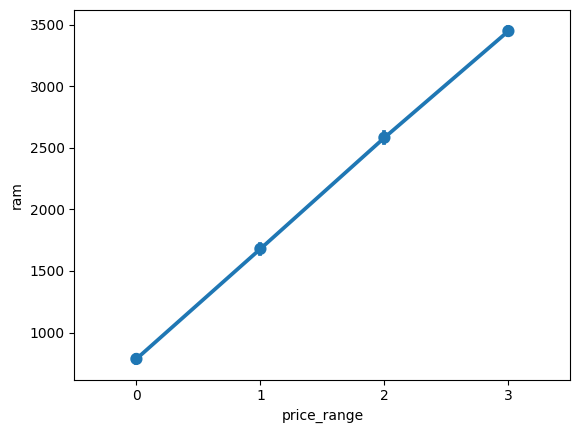

In [20]:
sns.pointplot(y = 'ram', x = 'price_range', data=df)

#Bluetooth vs Price Range

<Axes: xlabel='price_range', ylabel='blue'>

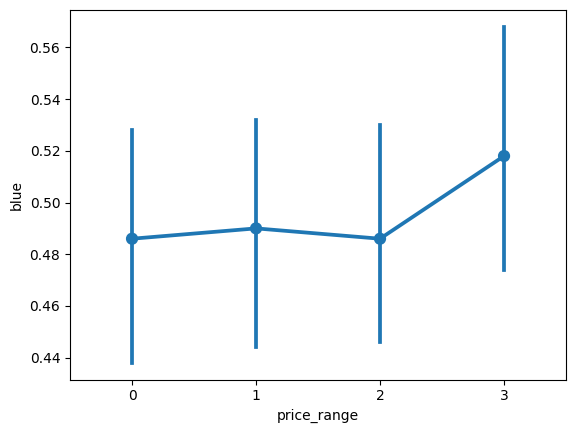

In [21]:
sns.pointplot(y = 'blue', x = 'price_range', data=df)

#With or without bluetooth vs price range

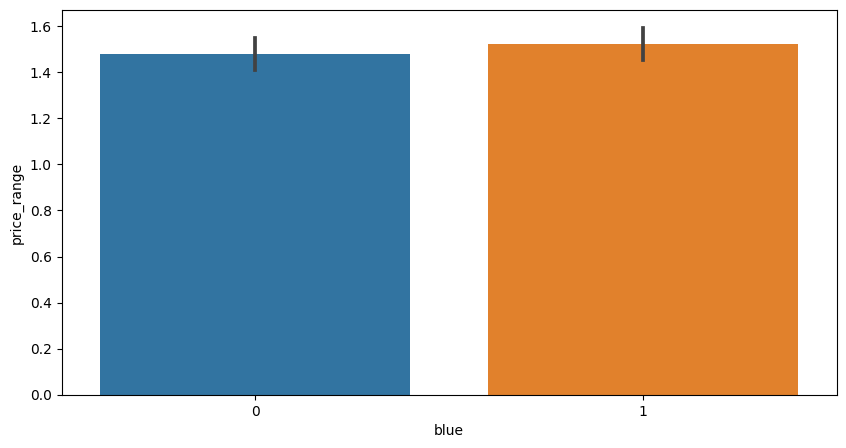

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='blue', y='price_range', ax=ax)
plt.show()

#Primary Camera Pixies vs Price Range

<Axes: xlabel='price_range', ylabel='pc'>

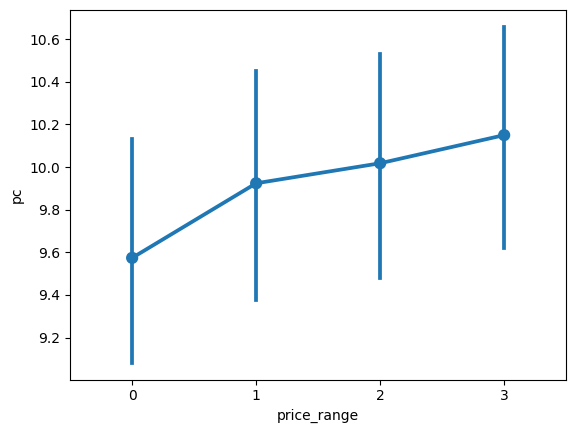

In [23]:
sns.pointplot(y = 'pc', x = 'price_range', data=df)

#Front Camera vs Price Range

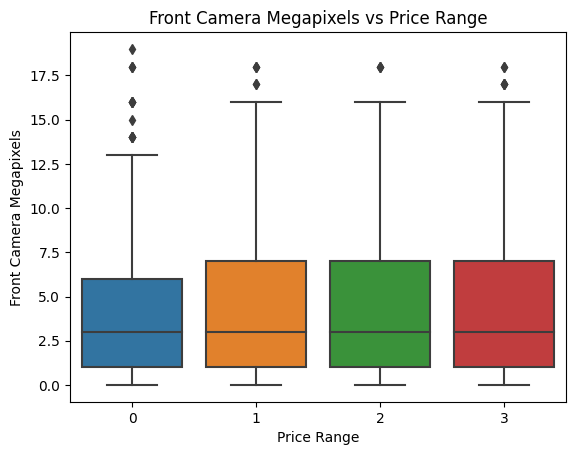

In [24]:
sns.boxplot(x='price_range', y='fc', data=df)
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.title('Front Camera Megapixels vs Price Range')
plt.show()

#Touch screen Vs Price Range

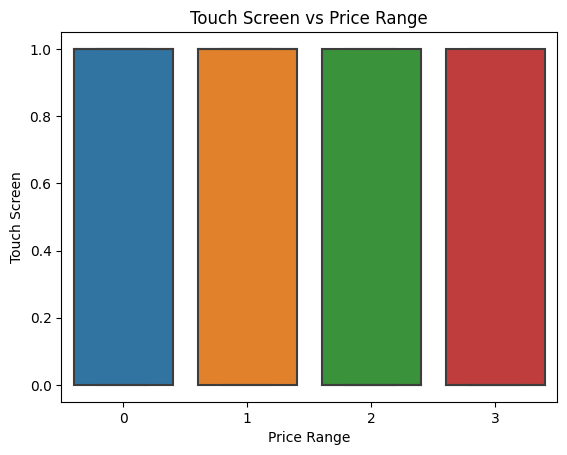

In [25]:
sns.boxplot(x='price_range', y='touch_screen', data=df)
plt.xlabel('Price Range')
plt.ylabel('Touch Screen')
plt.title('Touch Screen vs Price Range')
plt.show()

#3G vs Price Range

---



<Axes: xlabel='price_range', ylabel='three_g'>

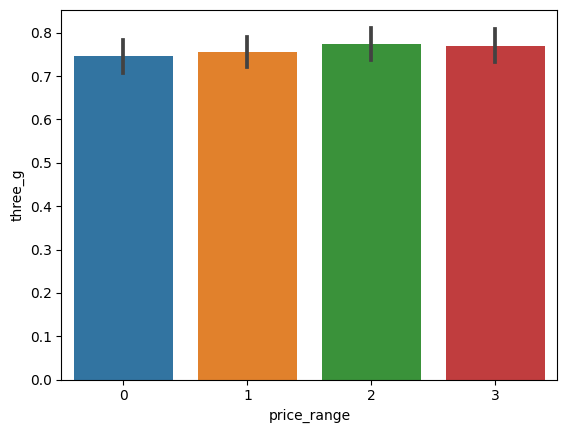

In [26]:
sns.barplot(x='price_range', y='three_g', data=df)

#4G vs Price Range

<Axes: xlabel='price_range', ylabel='four_g'>

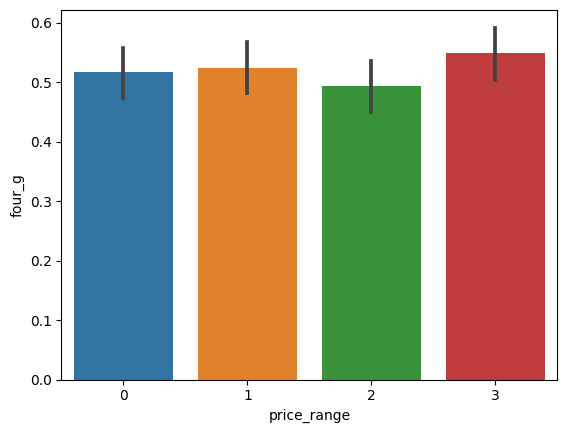

In [27]:
sns.barplot(x='price_range', y='four_g', data=df)

#Wifi Availability vs Price Range

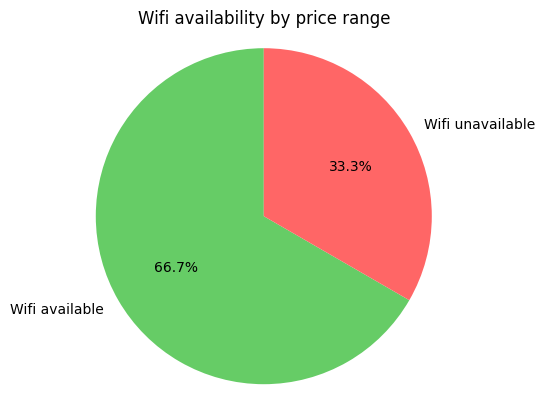

In [28]:
price_ranges = {
    'low': (0,50),
    'medium': (51,100),
    'high': (101,200),
    'premium': (201, float('inf')),

}
wifi_availabilities = {
    'low': True,
    'medium': True,
    'high': False,
    'premium': True
}

wifi_counts = {
    'available': 0,
    'unavailable': 0,
}
for price_range, wifi_available in wifi_availabilities.items():
    if wifi_available:
      wifi_counts['available'] += 1
    else:
        wifi_counts['unavailable'] += 1

        labels = ['Wifi available', 'Wifi unavailable']
        sizes = [wifi_counts['available'], wifi_counts['unavailable']]
        colors = ['#66cc66', '#ff6666']

        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')
        plt.title('Wifi availability by price range')
        plt.show()

#Correlation Heatmap

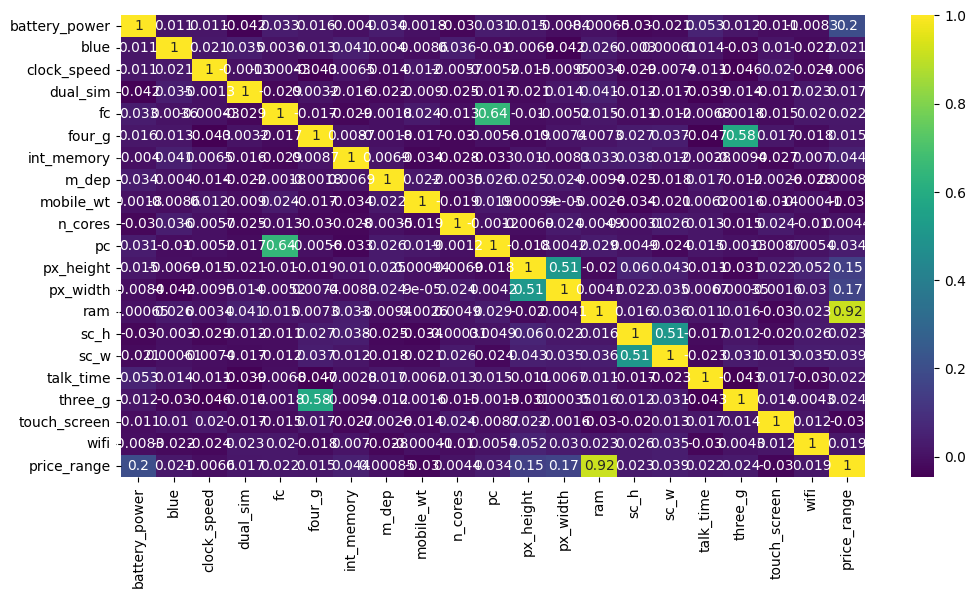

In [29]:
correlation = df.corr()
plt.figure(figsize=[12,6])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize':10})
plt.show()

#Hypothesis Testing
1. Null hypothesis: All categories of phone are distributed with equal price range
2. Alternative hypothesis: All categories of phone are not distributed with equal price range

In [30]:
from ipywidgets.widgets.widget_upload import observe
import pandas as pd
from scipy import stats #Perform Statistical test to obtain p-value
observed_freq = df['price_range'].value_counts().values #Calculated observed frequency distribution
total = len(df)
expected_freq = [total/4]*4 #Calculatee expected frequency distribution
chi2, p = stats.chisquare(observed_freq, f_exp=expected_freq) #Perform chi-square goodness-of-fit test
print(f'Chi-square statistics: {chi2}, p-value: {p}') #Print results

Chi-square statistics: 0.0, p-value: 1.0


#Feature Enginnering And Data-Preprocessing

#Checking And Handling Outliers

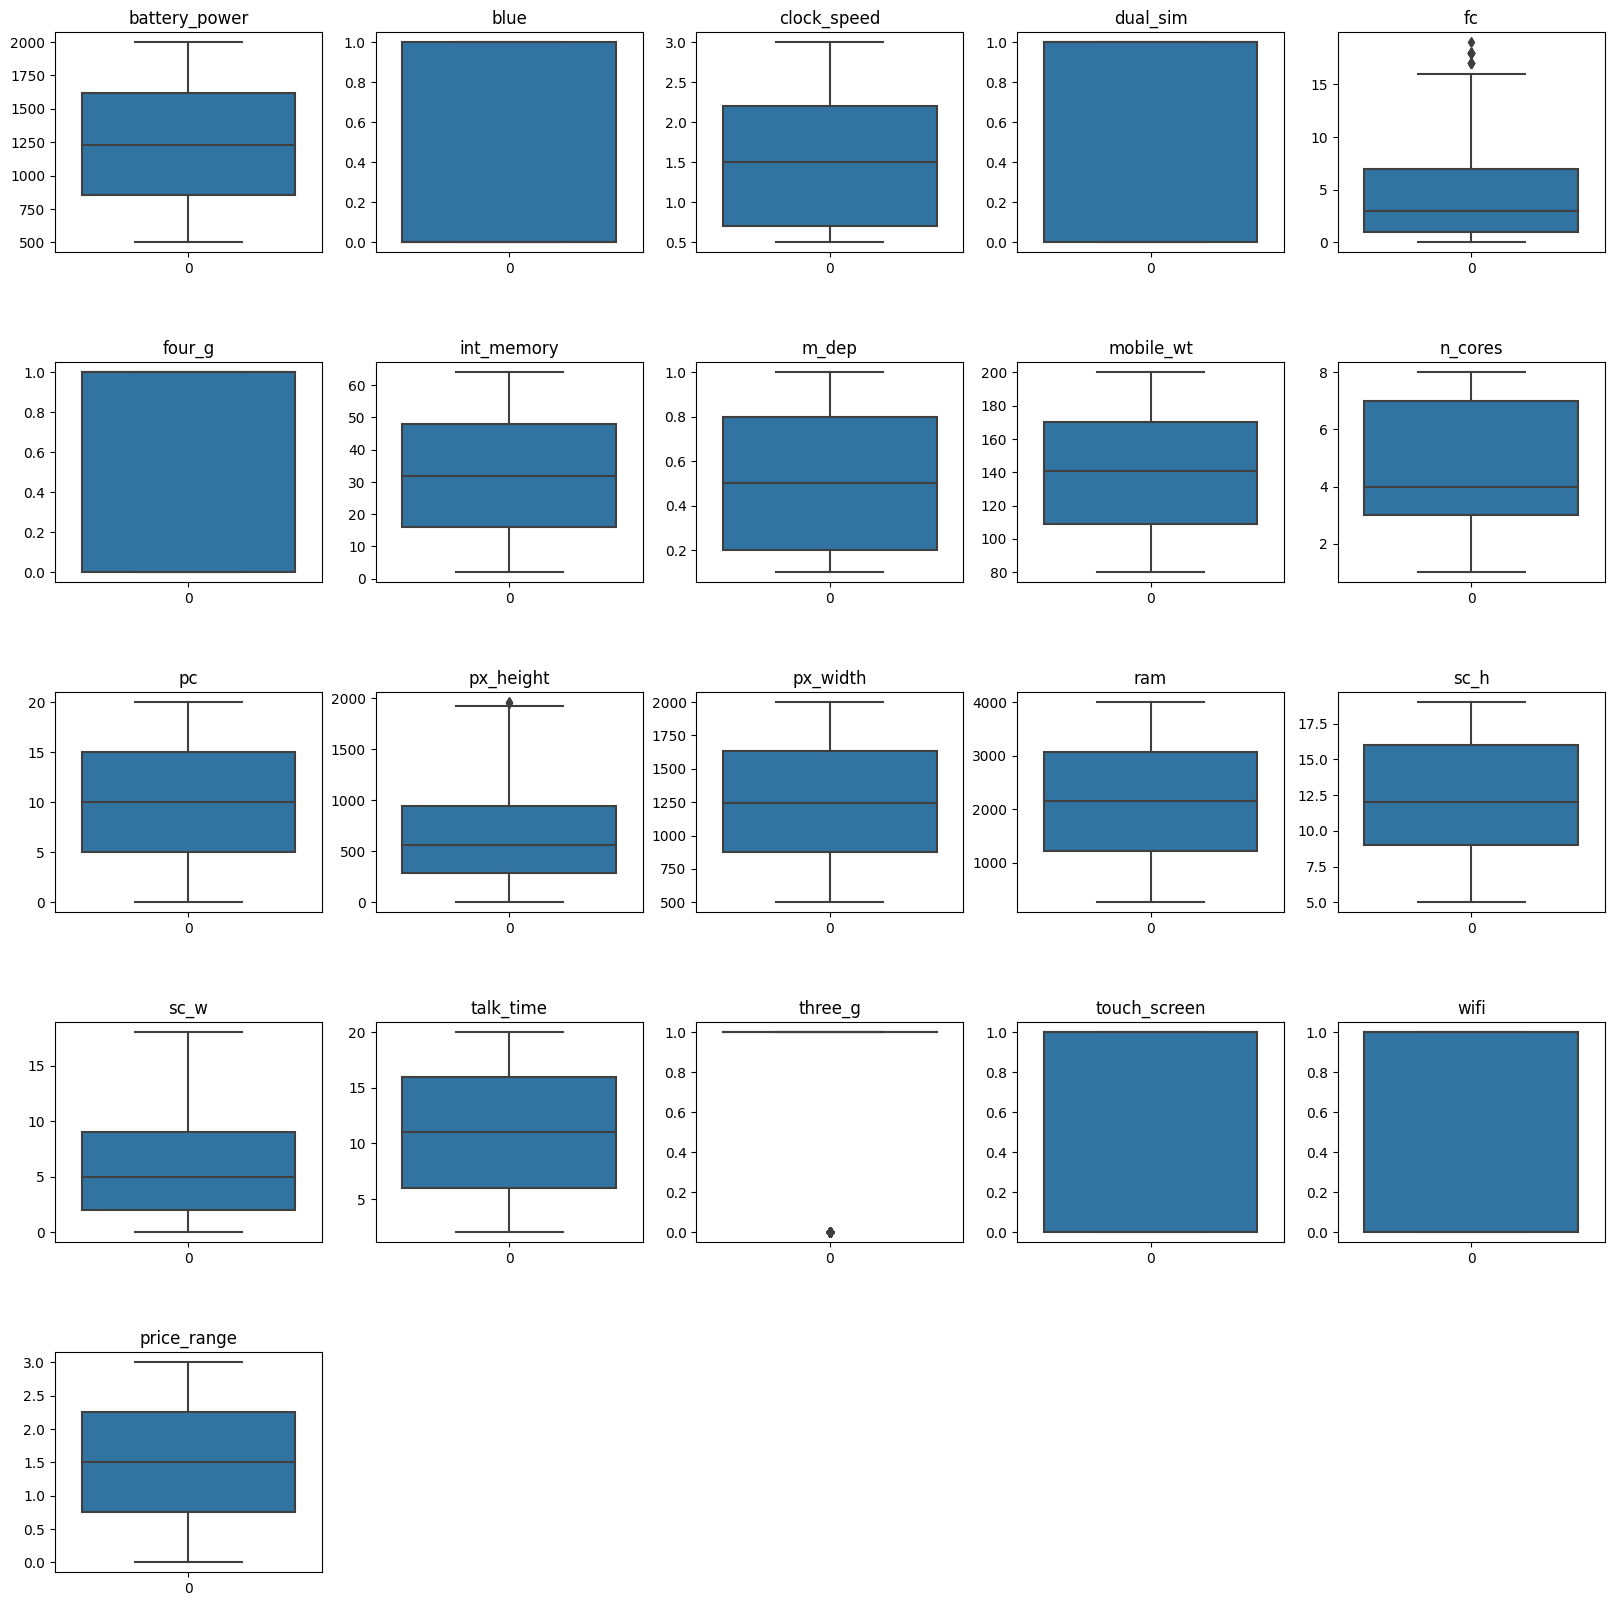

In [31]:
plt.figure(figsize=(20,20))
for index, item in enumerate([i for i in df.describe().columns.to_list()]):
  plt.subplot(5,5, index+1)
  sns.boxplot(df[item])
  plt.title(item)
  plt.subplots_adjust(hspace=0.5)
  print("\n")

#Categorical Encoding

Categorical encoding is not necessary because all values are in integer and float

#Data Transformation

#Renaming Columns

In [47]:
df_trainset = df

In [38]:
df_trainset = df_trainset.rename(columns = {'blue': 'bluetooth', 'fc': 'front_cam_pix', 'm_dep': 'mobile_depth', 'n_cores': 'num_of_core', 'pc': 'primary_cam_pix', 'sc_h': 'screen_height', 'sc_w': 'screen_width'})

In [39]:
df_trainset

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,num_of_core,...,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [40]:
columns_dropped = ['px_width', 'px_height', 'screen_height', 'screen_width', 'talk_time']
df_trainset = df_trainset.drop(columns_dropped, axis=1)

#The following data above were dropped because they don't have any use.

In [41]:
df_trainset

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,num_of_core,primary_cam_pix,ram,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,1,1,1,0


In [42]:
df_trainset.shape

(2000, 16)

#Data Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #Scaling value of df_trainset
df_trainset_scaled = scaler.fit_transform(df_trainset)

#Data Splitting

In [46]:
X = df_trainset.drop(['price_range'], axis=1)
y = df_trainset['price_range']

In [26]:
X.shape

(2000, 15)

In [27]:
y.shape

(2000,)

#Splitting dataset into train and test sets

In [36]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12)

In [37]:
X_train.shape

(1600, 15)

In [38]:
y_train.shape

(1600,)

#ML Model Implementation
#Logistic Regression

In [42]:
# from sklearn.linear_model import LogisticRegression
# X = LogisticRegression()
# y.fit(X_train, y_train)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
knn.score(X_train, y_train)

0.830625

In [47]:
predictions = knn.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8525

DATA ATTRIBUTES
In this data;
id:ID
battery_power: Total energy a battery can store measured in mAh
blue: Has bleutooth or not
clock_speed: Speed at which microprocessor executes instructions
dual_sim: Has duel sim support or not
fc: Front camera mega pixels
four_g: Has 4G or not
int_memory: Internal memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight Of Mobile Phone
n_cores: Number Of cores Of Processor
pc: Primary Camera Mega Pixels
px_height: Pixel Resolution Height
px_width: Pixel Resolution Weight
ram: Ramdom Access Memory in Megabytes
sc_h: Screen Height Of Mobile in cm
sc_w: Screen Width Of Mobile in cm
talk_time: Longest time that a single battery charge will last
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not



